In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [33]:
import pandas as pd 

file = 'heart.csv'
df = pd.read_csv(file)

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [34]:
print(df.isnull().sum())
df.info()
#No null values found, so we do not need to drop any rows.
#1025 rows and 14 columns

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [35]:
x = df.drop('target', axis=1)
y = df['target']


In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [37]:
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [38]:
LogReg = LogisticRegression(max_iter=1000, random_state=42)
LogReg.fit(X_train, y_train)
y_pred = LogReg.predict(X_test)
print(y_pred)

[1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1
 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1
 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1
 1 1 0 1 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1
 1 0 0 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0 1 0
 0 1 1 1 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0]


In [39]:
print('Classes', LogReg.classes_)
print('Intercept',LogReg.intercept_)
print("Coefficients", LogReg.coef_ )

Classes [0 1]
Intercept [-0.06575951]
Coefficients [[-0.02936012 -0.89405776  0.8755844  -0.29054526 -0.56024945 -0.06242585
   0.09024702  0.63943897 -0.38264891 -0.80872882  0.3455552  -0.82219416
  -0.63274989]]


In [40]:
print("Accuracy", LogReg.score(X_test, y_test))
print(classification_report(y_test, LogReg.predict(X_test)))
#0 = no heart disease
#1 = heart disease
#precision = positive identifications
#recall = actual positives
#F1 score = weighted average of precision and recall

Accuracy 0.7898832684824902
              precision    recall  f1-score   support

           0       0.84      0.73      0.78       132
           1       0.75      0.86      0.80       125

    accuracy                           0.79       257
   macro avg       0.80      0.79      0.79       257
weighted avg       0.80      0.79      0.79       257



In [41]:
cr = classification_report(y_test, y_pred, output_dict=True)
cr

{'0': {'precision': 0.8421052631578947,
  'recall': 0.7272727272727273,
  'f1-score': 0.7804878048780488,
  'support': 132.0},
 '1': {'precision': 0.7482517482517482,
  'recall': 0.856,
  'f1-score': 0.7985074626865671,
  'support': 125.0},
 'accuracy': 0.7898832684824902,
 'macro avg': {'precision': 0.7951785057048215,
  'recall': 0.7916363636363637,
  'f1-score': 0.789497633782308,
  'support': 257.0},
 'weighted avg': {'precision': 0.79645666641366,
  'recall': 0.7898832684824902,
  'f1-score': 0.789252229882192,
  'support': 257.0}}

Class 0:

    Precision 0.84,

    Recall 0.727,

    F1-score 0.78,

    132 samples,

Class 1:

    Precision 0.748,

    Recall 0.856,

    F1-score 0.798,

    125 samples,

Overall Accuracy - .789

macro avg - unweighted class wise avg 

0 = no heart disease

1 = heart disease

precision = positive identifications

recall = actual positives

F1 score = weighted average of precision and recall

In [42]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat
conf_disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=LogReg.classes_)


<Figure size 800x600 with 0 Axes>

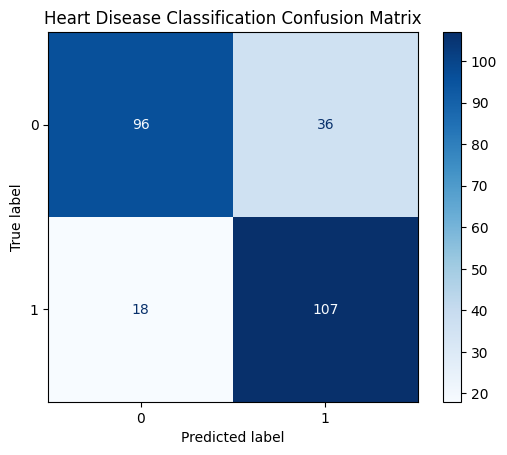

In [43]:
plt.figure(figsize=(8, 6))
conf_disp.plot(cmap='Blues')
plt.title("Heart Disease Classification Confusion Matrix")
plt.grid(False)
plt.show()

96 True Negatives with 18 False Negatives

36 False Positives with 107 True Positives